# 1.Astar

In [1]:
def aStarAlgo(start_node,stop_node):
    open_set=set(start_node)
    closed_set=set()
    g = {}
    parents = {}
    g[start_node] = 0
    parents[start_node] = start_node
    
    while len(open_set) > 0:
        n=None
        for v in open_set:
            if n == None or g[v] + heuristic(v) < g[n] +  heuristic(n):
                n = v
                
        if n==stop_node or Graph_nodes[n] == None:
            pass
        else:
            for (m,  weight) in get_neighbors(n):
                
                if m not in open_set and m not in closed_set:
                    open_set.add(m)
                    parents[m] = n
                    g[m] = g[n] + weight
                else:
                    if g[m] > g[n]+weight:
                        g[m]=g[n]+weight
                        parents[m]=n 
                        if m in closed_set:
                            closed_set.remove(m)
                            open_set.add(m)
        if n==None:
            print('path does not exist')
            return None
        if n == stop_node:
            path=[]
            while parents[n] !=n:
                path.append(n)
                n=parents[n]
            path.append(start_node)
            path.reverse()
            print('Path found: {}'.format(path))
            return path
        open_set.remove(n)
        closed_set.add(n)
    print('path does not exist!')
    return None

def get_neighbors(v):
            if v in Graph_nodes:
                return Graph_nodes[v] 
            else:
                return None
            
def heuristic(n):
    H_dist={
        'A':11,
        'B':6,
        'C':99,
        'D':1,
        'E':7,
        'G':0
    }     
    return H_dist[n]

Graph_nodes={
    'A':[('B',2),('E',3)],
    'B':[('G',9),('C',1)],
    'E':[('D',6)],
    'D':[('G',1)]
}
aStarAlgo('A','G')


Path found: ['A', 'E', 'D', 'G']


['A', 'E', 'D', 'G']

# 2.Best First Search

In [2]:
import heapq
Graph_nodes = { 
   'S': ['A','B'], 
   'A': ['C','D'], 
   'B': ['E','F'], 
   'E': ['H'],
   'F': ['I','G']
   }
def heuristic(n):
    H_dist = { 
        'S': 13,
        'A': 12,
        'B': 4,
        'C': 7,
        'D': 3,
        'E': 8,
        'F': 2,
        'H': 4,
        'I': 9,
        'G': 0
     } 
    return H_dist[n] 

def best_first_search(graph, start, goal):
    """
    graph: Dict having Tree Structure.
    start: Starting Node of the Tree.
    goal: Node to Search.
    heuristic: List of heuristic cost.
    """
    open = [(heuristic(start), start)]
    closed = {}
    closed[start] = None
    
    while open:
        _,peak_node = heapq.heappop(open)
        
        if peak_node == goal:
            break
            
        for neighbor in graph[peak_node]:
            if neighbor not in closed:
                heapq.heappush(open, (heuristic(neighbor), neighbor))
                closed[neighbor] = peak_node
    
    return closed
start_node = 'S'
goal_node = 'G'
closed = best_first_search(Graph_nodes, start_node, goal_node)
print("Closed list",closed)
node = goal_node
path = [node]

while node != start_node:
    node = closed[node]
    path.append(node)
    
path.reverse()
print("BFS path from",start_node,"to",goal_node,":",path)

Closed list {'S': None, 'A': 'S', 'B': 'S', 'E': 'B', 'F': 'B', 'I': 'F', 'G': 'F'}
BFS path from S to G : ['S', 'B', 'F', 'G']


# 3.AOStar

In [3]:
class Graph:
    def __init__(self, graph, heuristicNodeList, startNode):  #instantiate graph object with graph topology, heuristic values, start node
        
        self.graph = graph
        self.H=heuristicNodeList
        self.start=startNode
        self.parent={}
        self.status={}
        self.solutionGraph={}
     
    def applyAOStar(self):         # starts a recursive AO* algorithm
        self.aoStar(self.start, False)

    def getNeighbors(self, v):     # gets the Neighbors of a given node
        return self.graph.get(v,'')
    
    def getStatus(self,v):         # return the status of a given node
        return self.status.get(v,0)
    
    def setStatus(self,v, val):    # set the status of a given node
        self.status[v]=val
    
    def getHeuristicNodeValue(self, n):
        return self.H.get(n,0)     # always return the heuristic value of a given node
 
    def setHeuristicNodeValue(self, n, value):
        self.H[n]=value            # set the revised heuristic value of a given node 
        
    
    def printSolution(self):
        print("FOR GRAPH SOLUTION, TRAVERSE THE GRAPH FROM THE START NODE:",self.start)
        print("------------------------------------------------------------")
        print(self.solutionGraph)
        print("------------------------------------------------------------")
    
    def computeMinimumCostChildNodes(self, v):  # Computes the Minimum Cost of child nodes of a given node v     
        minimumCost=0
        costToChildNodeListDict={}
        costToChildNodeListDict[minimumCost]=[]
        flag=True
        for nodeInfoTupleList in self.getNeighbors(v):  # iterate over all the set of child node/s
            cost=0
            nodeList=[]
            for c, weight in nodeInfoTupleList:
                cost=cost+self.getHeuristicNodeValue(c)+weight
                nodeList.append(c)
            
            if flag==True:                      # initialize Minimum Cost with the cost of first set of child node/s 
                minimumCost=cost
                costToChildNodeListDict[minimumCost]=nodeList      # set the Minimum Cost child node/s
                flag=False
            else:                               # checking the Minimum Cost nodes with the current Minimum Cost   
                if minimumCost>cost:
                    minimumCost=cost
                    costToChildNodeListDict[minimumCost]=nodeList  # set the Minimum Cost child node/s
                
              
        return minimumCost, costToChildNodeListDict[minimumCost]   # return Minimum Cost and Minimum Cost child node/s
                     
    
    def aoStar(self, v, backTracking):     # AO* algorithm for a start node and backTracking status flag
                print("HEURISTIC VALUES  :", self.H)
                print("SOLUTION GRAPH    :", self.solutionGraph)
                print("PROCESSING NODE   :", v)
                print("-----------------------------------------------------------------------------------------")
        
                if self.getStatus(v) >= 0:        # if status node v >= 0, compute Minimum Cost nodes of v
                    minimumCost, childNodeList = self.computeMinimumCostChildNodes(v)
                    self.setHeuristicNodeValue(v, minimumCost)
                    self.setStatus(v,len(childNodeList))
            
                    solved=True                   # check the Minimum Cost nodes of v are solved   
                    for childNode in childNodeList:
                        self.parent[childNode]=v
                        if self.getStatus(childNode)!=-1:
                            solved=solved & False
            
                    if solved==True:             # if the Minimum Cost nodes of v are solved, set the current node status as solved(-1)
                        self.setStatus(v,-1)    
                        self.solutionGraph[v]=childNodeList # update the solution graph with the solved nodes which may be a part of solution  
            
            
                    if v!=self.start:           # check the current node is the start node for backtracking the current node value    
                        self.aoStar(self.parent[v], True)   # backtracking the current node value with backtracking status set to true
                
                    if backTracking==False:     # check the current call is not for backtracking 
                        for childNode in childNodeList:   # for eachhttp://localhost:8888/notebooks/aiml/data/Untitled.ipynb?kernel_name=python3# Minimum Cost child node
                            self.setStatus(childNode,0)   # set the status of child node to 0(needs exploration)
                            self.aoStar(childNode, False) # Minimum Cost child node is further explored with backtracking status as false
            
        

h1 = {'A': 1, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J': 1, 'T': 3}
graph1 = {
    'A': [[('B', 1), ('C', 1)], [('D', 1)]],
    'B': [[('G', 1)], [('H', 1)]],
    'C': [[('J', 1)]],
    'D': [[('E', 1), ('F', 1)]],
    'G': [[('I', 1)]]   
}

G1= Graph(graph1, h1, 'A')
G1.applyAOStar() 

HEURISTIC VALUES  : {'A': 1, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J': 1, 'T': 3}
SOLUTION GRAPH    : {}
PROCESSING NODE   : A
-----------------------------------------------------------------------------------------
HEURISTIC VALUES  : {'A': 10, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J': 1, 'T': 3}
SOLUTION GRAPH    : {}
PROCESSING NODE   : B
-----------------------------------------------------------------------------------------
HEURISTIC VALUES  : {'A': 10, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J': 1, 'T': 3}
SOLUTION GRAPH    : {}
PROCESSING NODE   : A
-----------------------------------------------------------------------------------------
HEURISTIC VALUES  : {'A': 10, 'B': 6, 'C': 2, 'D': 12, 'E': 2, 'F': 1, 'G': 5, 'H': 7, 'I': 7, 'J': 1, 'T': 3}
SOLUTION GRAPH    : {}
PROCESSING NODE   : G
-----------------------------------------------------------------------------------------
HEURISTIC VALUES 

# 4.ID3

In [4]:
import pandas as pd
df_tennis = pd.read_csv('4.csv')
print("\n Given Play Tennis Data Set:\n\n", df_tennis)

def entropy(probs):  
    import math
    return sum( [-prob*math.log(prob, 2) for prob in probs] )

def entropy_of_list(a_list):  
    from collections import Counter
    cnt = Counter(x for x in a_list)   
    num_instances = len(a_list)*1.0   
    probs = [x / num_instances for x in cnt.values()]  
    return entropy(probs) 

def information_gain(df, split_attribute_name, target_attribute_name, trace=0):
    df_split = df.groupby(split_attribute_name)
    nobs = len(df.index) * 1.0
    df_agg_ent = df_split.agg({target_attribute_name : [entropy_of_list, lambda x: len(x)/nobs] })[target_attribute_name]
    df_agg_ent.columns = ['Entropy', 'PropObservations']
    new_entropy = sum( df_agg_ent['Entropy'] * df_agg_ent['PropObservations'] )
    old_entropy = entropy_of_list(df[target_attribute_name])
    return old_entropy - new_entropy

def id3(df, target_attribute_name, attribute_names, default_class=None):
    from collections import Counter
    cnt = Counter(x for x in df[target_attribute_name])# class of YES /NO
    print(cnt)
    if len(cnt) == 1:
        print(len(cnt))
        return next(iter(cnt)) # next input data set, or raises StopIteration when EOF is hit.
    elif df.empty or (not attribute_names):
        return default_class  
    else:      
        default_class = max(cnt.keys()) 
        gainz = [information_gain(df, attr, target_attribute_name) for attr in attribute_names] 
        print("Gain=",gainz)
        index_of_max = gainz.index(max(gainz)) 
        best_attr = attribute_names[index_of_max]
        print("Best Attribute:",best_attr)
        tree = {best_attr:{}} 
        remaining_attribute_names = [i for i in attribute_names if i != best_attr]
        
        
        for attr_val, data_subset in df.groupby(best_attr):
            subtree = id3(data_subset,
                        target_attribute_name,
                        remaining_attribute_names,
                        default_class)
            tree[best_attr][attr_val] = subtree
        return tree


attribute_names = list(df_tennis.columns)
print("List of Attributes:", attribute_names) 
attribute_names.remove('PlayTennis')  
print("Predicting Attributes:", attribute_names)

# Run Algorithm:
from pprint import pprint
tree = id3(df_tennis,'PlayTennis',attribute_names)
print("\n\nThe Resultant Decision Tree is :\n")
pprint(tree)



 Given Play Tennis Data Set:

    PlayTennis   Outlook Temperature Humidity    Wind
0          No     Sunny         Hot     High    Weak
1          No     Sunny         Hot     High  Strong
2         Yes  Overcast         Hot     High    Weak
3         Yes      Rain        Mild     High    Weak
4         Yes      Rain        Cool   Normal    Weak
5          No      Rain        Cool   Normal  Strong
6         Yes  Overcast        Cool   Normal  Strong
7          No     Sunny        Mild     High    Weak
8         Yes     Sunny        Cool   Normal    Weak
9         Yes      Rain        Mild   Normal    Weak
10        Yes     Sunny        Mild   Normal  Strong
11        Yes  Overcast        Mild     High  Strong
12        Yes  Overcast         Hot   Normal    Weak
13         No      Rain        Mild     High  Strong
List of Attributes: ['PlayTennis', 'Outlook', 'Temperature', 'Humidity', 'Wind']
Predicting Attributes: ['Outlook', 'Temperature', 'Humidity', 'Wind']
Counter({'Yes': 9, 'No

C:\Users\shaun\AppData\Local\Temp\ipykernel_21448\421881151.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# 5.Non-parametric Locally Weighted Regression

C:\Users\shaun\AppData\Local\Temp\ipykernel_21448\4146807050.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  weights[j,j] = np.exp(diff*diff.T/(-2.0*k**2))
C:\Users\shaun\AppData\Local\Temp\ipykernel_21448\4146807050.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ypred[i] = xmat[i] * localWeight(xmat[i], xmat,ymat, k)


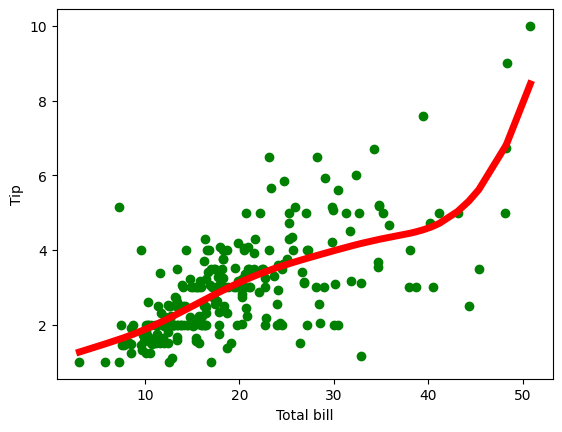

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def kernel(point, xmat, k):
    m, n = np.shape(xmat)
    weights = np.mat(np.eye((m)))
    for j in range(m):
        diff = point - xmat[j]
        weights[j,j] = np.exp(diff*diff.T/(-2.0*k**2))
    return weights

def localWeight(point, xmat, ymat, k):
    wei = kernel(point, xmat, k)
    W = (xmat.T*(wei*xmat)).I*(xmat.T*(wei*ymat.T))
    return W

def localWeightRegression(xmat, ymat, k):
    m, n = np.shape(xmat)
    ypred = np.zeros(m)
    for i in range(m):
        ypred[i] = xmat[i] * localWeight(xmat[i], xmat,ymat, k)
    return ypred

def graphPlot(X, ypred,bill,tip):
    sortindex = X[:,1].argsort(0)
    xsort = X[sortindex][:,0]
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(bill, tip, color='green')
    ax.plot(xsort[:,1], ypred[sortindex], color = 'red', linewidth = 5)
    plt.xlabel('Total bill')
    plt.ylabel('Tip')
    plt.show()

data = pd.read_csv('data9.csv')
bill = np.array(data.total_bill)
tip = np.array(data.tip)

mbill = np.mat(bill)
mtip = np.mat(tip)
m = np.shape(mbill)[1]
one = np.mat(np.ones(m))
X = np.hstack((one.T, mbill.T))

ypred = localWeightRegression(X, mtip, 5)
graphPlot(X, ypred, bill,tip)

# 6.Naïve Bayesian classifier

In [ ]:
import csv, random, math


def loadcsv(filename):
    lines = csv.reader(open(filename, "r"))
    dataset = list(lines)
    # print(dataset)
    # print(len(dataset))
    for i in range(len(dataset)):
        # print(dataset[i])
        dataset[i] = [float(x) for x in dataset[i]]
    return dataset


def splitDataset(dataset, splitRatio):
    trainSize = int(len(dataset) * splitRatio)
    print(trainSize)
    trainSet = []
    copy = list(dataset)
    while len(trainSet) < trainSize:
        index = random.randrange(len(copy))
        trainSet.append(copy.pop(index))
    return [trainSet, copy]


def seperateByClass(dataset):
    seperated = {}
    for i in range(len(dataset)):
        vector = dataset[i]
        # print(vector)
        if (vector[-1] not in seperated):
            seperated[vector[-1]] = []
        seperated[vector[-1]].append(vector)
    return seperated


def mean(numbers):
    return sum(numbers) / float(len(numbers))


def stddev(numbers):
    avg = mean(numbers)
    variance = sum([pow(x - avg, 2) for x in numbers]) / float(len(numbers) - 1)
    return math.sqrt(variance)


def summarize(dataset):
    summaries = [(mean(attribute), stddev(attribute)) for attribute in zip(*dataset)]

    del summaries[-1]
    return summaries


def summarizeByClass(dataset):
    seperated = seperateByClass(dataset)
    # print("Separated", seperated)
    summaries = {}
    for classValue, instances in seperated.items():
        summaries[classValue] = summarize(instances)
    return summaries


def calculateProbablity(x, mean, stddev):
    exponent = math.exp(-(math.pow(x - mean, 2) / (2 * math.pow(stddev, 2))))
    return (1 / (math.sqrt(2 * math.pi) * stddev)) * exponent


def calculateClassProbablities(summaries, inputVector):
    probabilities = {}
    for classValue, classSummaries in summaries.items():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, stddev = classSummaries[i]
            x = inputVector[i]
            print("**", mean, stddev, x)
            probabilities[classValue] *= calculateProbablity(x, mean, stddev)
            print("Individual probability", probabilities[classValue])
    return probabilities


def predict(summaries, inputVector):
    probabilities = calculateClassProbablities(summaries, inputVector)
    print("@@@@", probabilities)
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
    return bestLabel


def getPredictions(summaries, testSet):
    predictions = []
    for i in range(len(testSet)):
        result = predict(summaries, testSet[i])
        predictions.append(result)
    return predictions


def getAccuracy(testSet, predictions):
    correct = 0
    for i in range(len(testSet)):
        if (testSet[i][-1] == predictions[i]):
            correct += 1
    return (correct / float(len(testSet))) * 100.0


def NaiveBayes():
    filename = 'data6.csv'
    splitRatio = 0.8
    dataset = loadcsv(filename)

    print("\nThe length of the Data Set :", len(dataset))
    print("\nThe Data Set Splitting into Training and Testing \n")
    trainingSet, testSet = splitDataset(dataset, splitRatio)

    print("\nNumber of Rows in Training Set:{0} rows".format(len(trainingSet)))
    print("\nNumber of Rows in Testing Set:{0} rows".format(len(testSet)))
    print("\nFirst Five Rows of Training Set:\n")
    for i in range(0, 5):
        print(trainingSet[i], "\n")
    print("\nFirst Five Rows of Testing Set:\n")
    for i in range(0, 3):
        print(testSet[i], "\n")

    summaries = summarizeByClass(trainingSet)
    print("\nModel Summaries:\n", summaries)

    predictions = getPredictions(summaries, testSet)
    print("\n Predictions:\n",predictions)

    accuracy = getAccuracy(testSet, predictions)
    print("\nAccuracy: {0}%".format(accuracy))
import csv,random,math
NaiveBayes()

# 7.k-Nearest Neighbor

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import datasets

"""
Iris Plants Dataset, dataset contains 150 (50 in each of three classes)
Number of Attributes: 4 numeric, predictive attributes and the Class
"""
iris=datasets.load_iris()

""" 
The x variable contains the first four columns of the dataset 
(i.e. attributes) while y contains the labels.
"""
x = iris.data
y = iris.target
print ('sepal-length', 'sepal-width', 'petal-length', 'petal-width')
print(x)
print('class: 0-Iris-Setosa, 1- Iris-Versicolour, 2- Iris-Virginica')
print(y)

""" splits the dataset into 70% train data and 30% test data. This means that 
out of total 150 records,the training set will contain 105 records and 
the test set contains 45 of those records """
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

#to Training the model and Nearest nighbors K=5
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

#to make predictions on our test data
y_pred=classifier.predict(x_test)

""" For evaluating an algorithm, confusion matrix, precision, recall and 
f1 score are the most commonly used metrics."""
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))
print('Accuracy Metrics')
print(classification_report(y_test,y_pred))

sepal-length sepal-width petal-length petal-width
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]


# 8.Artificial Neural Network by implementing the Back propagation algorithm

In [8]:
import numpy as np  
# numpy is commonly used to process number array

# Get the data
X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float) # Features ( Hrs Slept, Hrs Studied)
y = np.array(([92], [86], [89]), dtype=float)       # Labels(Marks obtained)

X = X/np.amax(X,axis=0) # maximum of X array longitudinally
y = y/100

# Sigmoid Function
def sigmoid (x):
    return 1/(1 + np.exp(-x))

# Derivative of Sigmoid Function
def derivatives_sigmoid(x):
    return x * (1 - x)
# Variable initialization
epoch=5000              #Setting training iterations
lr=0.1                  #Setting learning rate (eta)
inputlayer_neurons = 2  #number of features in data set
hiddenlayer_neurons = 3 #number of hidden layers neurons
output_neurons = 1      #number of neurons at output layer
# Weight and bias initialization
wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons)) # 2x3
bh=np.random.uniform(size=(1,hiddenlayer_neurons))                  # 1x3
wout=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))   # 1x1
bout=np.random.uniform(size=(1,output_neurons))

# Draws a random range of numbers uniformly of dim x*y
for i in range(epoch):
    
    # Forward Propogation
    hinp1=np.dot(X,wh)              # Dot product
    hinp=hinp1 + bh                 # Add bias
    hlayer_act = sigmoid(hinp)      # Activation function
    outinp1=np.dot(hlayer_act,wout) 
    outinp= outinp1+ bout
    output = sigmoid(outinp)

    #Backpropagation

    # Error at Output layer
    EO = y-output                           # Error at o/p
    outgrad = derivatives_sigmoid(output)   # 
    d_output = EO* outgrad                  # Errj=Oj(1-Oj)(Tj-Oj)

    # Error at Hidden later
    EH = d_output.dot(wout.T)               # .T means transpose
    hiddengrad = derivatives_sigmoid(hlayer_act) # How much hidden layer wts contributed to error
    d_hiddenlayer = EH * hiddengrad
    wout += hlayer_act.T.dot(d_output) *lr  # Dotproduct of nextlayererror and currentlayerop
    wh += X.T.dot(d_hiddenlayer) *lr
    
print("Input: \n" + str(X)) 
print("Actual Output: \n" + str(y))
print("Predicted Output: \n" ,output)


Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
 [[0.89772669]
 [0.87381477]
 [0.89781348]]


# 9.EM Algorithm

x: [[1.  1. ]
 [1.5 2. ]
 [3.  4. ]
 [5.  7. ]
 [3.5 5. ]
 [4.5 5. ]
 [3.5 4.5]]
graph for whole dataset


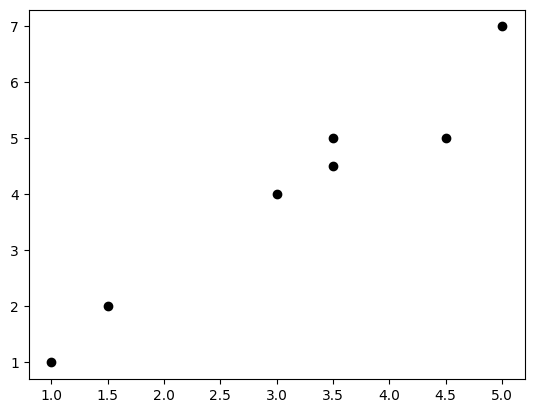

labels for kmeans: [1 1 0 0 0 0 0]
graph using KMeans Algorithm
centroids: [[3.9  5.1 ]
 [1.25 1.5 ]]


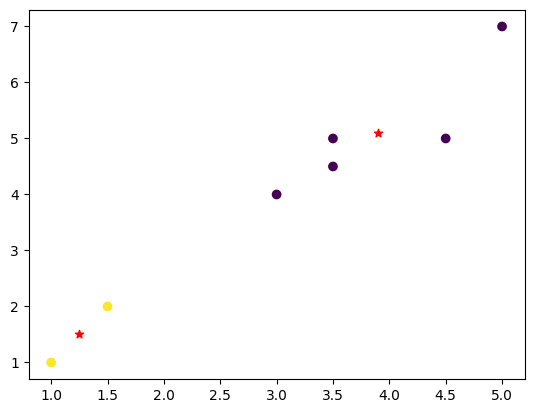

labels for GMM: [0 0 1 1 1 1 1]
Graph using EM Algorithm


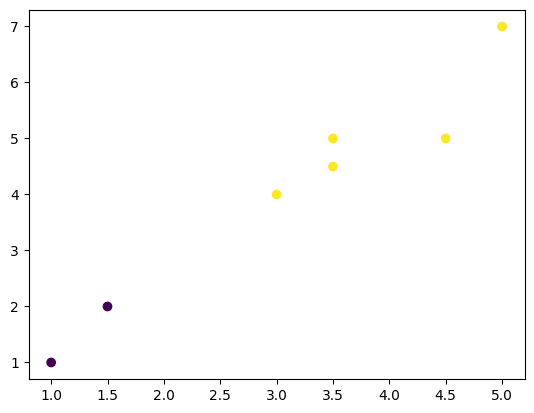

In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

data=pd.read_csv('ex.csv')
f1=data['V1'].values
f2=data['V2'].values
X=np.array(list(zip(f1,f2)))
print("x:",X)
print("graph for whole dataset")
plt.scatter(f1,f2,c='black')
plt.show()
kmeans=KMeans(2)
labels=kmeans.fit(X).predict(X)
print("labels for kmeans:",labels)
print("graph using KMeans Algorithm")
plt.scatter(f1,f2,c=labels)
centroids=kmeans.cluster_centers_
print("centroids:",centroids)
plt.scatter(centroids[:,0],centroids[:,1],marker='*',c='red')
plt.show()
gmm=GaussianMixture(2)
labels=gmm.fit(X).predict(X)
print("labels for GMM:",labels)
print("Graph using EM Algorithm")
plt.scatter(f1,f2,c=labels)
plt.show()